In [10]:
import Ensemble
import numpy as np
import skimage
from skimage.io import imread,imsave
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(1200, 1920, 3)
(200, 1200, 1920)


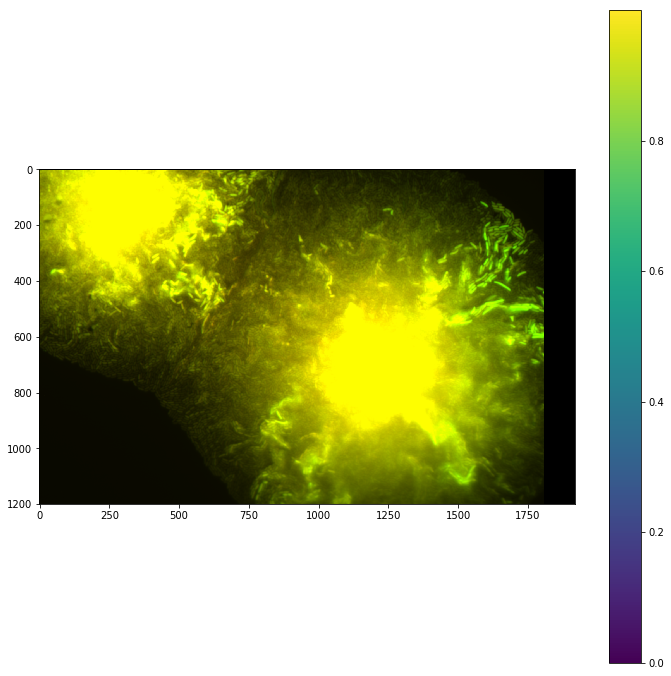

In [13]:
startframe = 30
step = 1
nframes = 200
nt = nframes-1
#filename = '/home/timrudge/cellmodeller/data/info_tracking-18-06-08-12-59/step-%05d.png'
#filename = '/home/timrudge/cellmodeller/data/random_grey-18-08-07-15-45/step-%05d.png'
filename = '/media/timrudge/tjr34_ntfs/Microscopy/Cavendish/10.01.16/Pos0000/aligned_Frame%04dStep%04d.tiff'
#filename = '/home/timrudge/AndreaRavasioData/masked image/%02d.tif'
#filename = '/home/timrudge/ignacio_pickles/step-%05d.png'
#filename = '/home/timrudge/Code/InfoTracking/testdata/aligned_Frame%04dStep%04d.tif'
ima = np.array([imread(filename%(0,startframe+(nframes-i)*step)).astype(np.float32) for i in range(nframes)])
#ima = ima[:,0:500,1000:1500]
imb = np.array([imread(filename%(2,startframe+(nframes-i)*step)).astype(np.float32) for i in range(nframes)])
#imb = imb[:,0:500,1000:1500]
im = np.zeros((ima.shape[0],ima.shape[1],ima.shape[2],3), dtype=np.float32)
im[:,:,:,0] = ima
im[:,:,:,1] = imb

print(im[0].shape)
plt.figure(figsize=(12,12))
plt.imshow(im[0]/2**16)
plt.colorbar()
eg = Ensemble.EnsembleGrid(im)
print(ima.shape)

In [14]:
eg.initialise_ensembles(64,64, 32,32, 8,8)
print(eg.gx,eg.gy)

37 60


In [ ]:
eg.compute_motion(nt,7,7,dt=1)

In [5]:
eg.save_quivers('quivers', 'test_%04d.png', normed=True)
eg.save_paths('paths', 'test_%04d.png')

/home/timrudge/Code/InfoTracking/Ensemble.py:260: RuntimeWarning: invalid value encountered in true_divide
  plt.quiver(self.gw/2+pos[:,:,t,1],self.gh/2+pos[:,:,t,0], vel[:,:,t,0]/norm, vel[:,:,t,1]/norm)


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

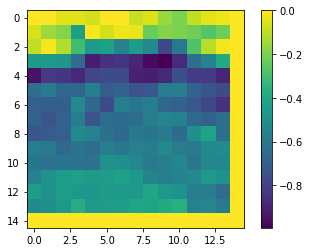

In [6]:
max_ll = eg.max_ll()
max_ll.shape
plt.imshow(max_ll[:,:,0])
plt.colorbar()

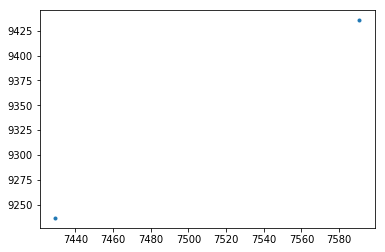

In [7]:
fluo = eg.fluo()
fluo.shape
plt.plot(fluo[5,5,:,0], fluo[5,5,:,1], '.')


In [8]:
eg.save_data('nparrays')
pos = np.fromfile('nparrays/pos.np')
pos.shape

(900,)

In [9]:
eg.save_rois('rois', 'test_%04d_%04d_%04d.tif')

/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0000_0000_0000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0000_0000_0001.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0000_0001_0000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0000_0001_0001.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0000_0002_0000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0000_0002_0001.tif is a lo

/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0009_0014_0000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0009_0014_0001.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0010_0014_0000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0010_0014_0001.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0011_0014_0000.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: rois/test_0011_0014_0001.tif is a lo